In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


In [2]:
data = pd.read_csv("Data/Electric Vehicle Sales by State in India.csv")
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [3]:
data.shape

(96845, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [5]:
data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [6]:
data.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [7]:
# Data Cleaning and Preprocessing
data['Year'] = data['Year'].astype(int)
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
# Total EV Sales Over Time (Yearly)
yearly_sales = data.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
print("Total EV Sales Over Time (Yearly):")
print(yearly_sales)

Total EV Sales Over Time (Yearly):
    Year  EV_Sales_Quantity
0   2014             2392.0
1   2015             7805.0
2   2016            49855.0
3   2017            87420.0
4   2018           130254.0
5   2019           166819.0
6   2020           124684.0
7   2021           331498.0
8   2022          1024723.0
9   2023          1525179.0
10  2024           143182.0


- EV sales have shown significant growth over the years, with a major surge in 2022 and 2023. Sales rose from 2,392 units in 2014 to 1,525,179 units in 2023.

In [9]:
# Year-on-Year Growth
yearly_sales['YoY_Growth'] = yearly_sales['EV_Sales_Quantity'].pct_change() * 100
print("Year-on-Year Growth in EV Sales:")
print(yearly_sales)

Year-on-Year Growth in EV Sales:
    Year  EV_Sales_Quantity  YoY_Growth
0   2014             2392.0         NaN
1   2015             7805.0  226.295987
2   2016            49855.0  538.757207
3   2017            87420.0   75.348511
4   2018           130254.0   48.997941
5   2019           166819.0   28.072075
6   2020           124684.0  -25.257914
7   2021           331498.0  165.870521
8   2022          1024723.0  209.118909
9   2023          1525179.0   48.838174
10  2024           143182.0  -90.612118


- The highest year-on-year growth was observed in 2016 (538.76%) and 2022 (209.12%). There was a notable decline in 2020 (-25.26%), likely due to the global pandemic, and a significant drop in 2024 (-90.61%), which might be due to incomplete data for the year.

In [10]:
# Monthly Sales Trends (Overall)
monthly_sales_overall = data.groupby('Month_Name')['EV_Sales_Quantity'].sum().reindex([
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]).reset_index()
print("Monthly Sales Trends (Overall):")
print(monthly_sales_overall)

Monthly Sales Trends (Overall):
   Month_Name  EV_Sales_Quantity
0         jan           360703.0
1         feb           228739.0
2         mar           299888.0
3         apr           232194.0
4         may           262747.0
5         jun           229754.0
6         jul           270473.0
7         aug           294022.0
8         sep           313433.0
9         oct           355083.0
10        nov           382217.0
11        dec           364558.0


- November consistently shows the highest overall sales, followed by December and January. This could be attributed to festive seasons or year-end purchases.

In [11]:
# Monthly Sales Trends (Yearly)
monthly_sales_yearly = data.groupby(['Year', 'Month_Name'])['EV_Sales_Quantity'].sum().unstack()
print("\n4. Monthly Sales Trends (Yearly):")
print(monthly_sales_yearly)


4. Monthly Sales Trends (Yearly):
Month_Name       apr       aug       dec       feb       jan       jul  \
Year                                                                     
2014           252.0     180.0     237.0     171.0     232.0     199.0   
2015           175.0     711.0    2184.0     182.0     174.0     383.0   
2016          3443.0    4022.0    4508.0    2499.0    1946.0    4380.0   
2017          5054.0    9169.0    9115.0    4411.0    4582.0    9047.0   
2018          7335.0   11792.0   15879.0    7372.0    9003.0   11397.0   
2019         11185.0   13252.0   17030.0   12228.0   13379.0   12479.0   
2020           975.0    8558.0   15860.0   16569.0   16865.0    7799.0   
2021         15020.0   30818.0   53749.0   20073.0   17025.0   28146.0   
2022         77522.0   89012.0  104963.0   58056.0   51476.0   80887.0   
2023        111233.0  126508.0  141033.0  107178.0  102839.0  115756.0   
2024             NaN       NaN       NaN       NaN  143182.0       NaN   

Mo

- While November generally has high sales, monthly trends vary significantly by year, reflecting the dynamic nature of the EV market and factors influencing demand.

In [12]:
#  Top 5 States by Total EV Sales
state_sales = data.groupby('State')['EV_Sales_Quantity'].sum().nlargest(5).reset_index()
print(" Top 5 States by Total EV Sales:")
print(state_sales)

 Top 5 States by Total EV Sales:
           State  EV_Sales_Quantity
0  Uttar Pradesh           732074.0
1    Maharashtra           401535.0
2      Karnataka           315498.0
3          Delhi           268538.0
4      Rajasthan           228573.0


- Uttar Pradesh leads by a significant margin, followed by Maharashtra, Karnataka, Delhi, and Rajasthan, indicating these states are at the forefront of EV adoption.

In [13]:
# States with the Lowest EV Sales
state_sales_lowest = data.groupby('State')['EV_Sales_Quantity'].sum().nsmallest(5).reset_index()
print(". States with the Lowest EV Sales:")
print(state_sales_lowest)

. States with the Lowest EV Sales:
                      State  EV_Sales_Quantity
0                    Sikkim                4.0
1         Arunachal Pradesh               40.0
2                  Nagaland               52.0
3                    Ladakh               88.0
4  Andaman & Nicobar Island              202.0


- Sikkim, Arunachal Pradesh, Nagaland, Ladakh, and Andaman & Nicobar Island show minimal EV sales, highlighting areas where EV adoption is still very low and may require more infrastructure and incentives.

In [14]:
# Average EV Sales per State per Year
avg_sales_state_year = data.groupby(['State', 'Year'])['EV_Sales_Quantity'].mean().reset_index()
print("Average EV Sales per State per Year (first 5 rows):")
print(avg_sales_state_year.head())

Average EV Sales per State per Year (first 5 rows):
                      State  Year  EV_Sales_Quantity
0  Andaman & Nicobar Island  2014           0.000000
1  Andaman & Nicobar Island  2015           0.000000
2  Andaman & Nicobar Island  2016           0.000000
3  Andaman & Nicobar Island  2017           0.000000
4  Andaman & Nicobar Island  2018           0.153846


- Average sales per state per year vary widely, reflecting the disparities in EV adoption and market maturity across different regions. For instance, Andaman & Nicobar Island recorded 0 average sales per year between 2014 and 2017.

In [15]:
#  State-wise Growth (Recent Years - 2021, 2022, 2023 for example)
recent_years_df = data[data['Year'].isin([2021, 2022, 2023])]
state_growth_recent = recent_years_df.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().unstack()
print("State-wise Growth in Recent Years (2021, 2022, 2023 - first 5 rows):")
print(state_growth_recent.head())

State-wise Growth in Recent Years (2021, 2022, 2023 - first 5 rows):
Year                         2021     2022     2023
State                                              
Andaman & Nicobar Island     92.0     23.0     26.0
Andhra Pradesh             9540.0  29006.0  31506.0
Arunachal Pradesh             2.0      2.0     21.0
Assam                     15633.0  40720.0  60798.0
Bihar                     23082.0  55752.0  88186.0


- States like Andhra Pradesh, Assam, and Bihar show significant growth in EV sales over recent years, indicating increasing momentum in these regions.

In [16]:
# Total Sales by Vehicle Category
category_sales = data.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()
print("Total Sales by Vehicle Category:")
print(category_sales)

Total Sales by Vehicle Category:
  Vehicle_Category  EV_Sales_Quantity
0       2-Wheelers          1808105.0
1       3-Wheelers          1620310.0
2       4-Wheelers           149775.0
3              Bus             7009.0
4           Others             8612.0


- 2-Wheelers and 3-Wheelers dominate the EV market in terms of sales volume, significantly outpacing 4-Wheelers and Buses.

In [17]:
# Sales Distribution by Vehicle Type
type_sales = data.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index()
print(" Sales Distribution by Vehicle Type:")
print(type_sales)

 Sales Distribution by Vehicle Type:
          Vehicle_Type  EV_Sales_Quantity
0          2W_Personal          1796340.0
1            2W_Shared            11765.0
2             3W_Goods            44974.0
3    3W_Goods_LowSpeed            90656.0
4          3W_Personal              421.0
5            3W_Shared            76132.0
6   3W_Shared_LowSpeed          1408127.0
7          4W_Personal           130676.0
8            4W_Shared            19099.0
9                  Bus             7009.0
10     Institution Bus                0.0
11              Others             8612.0


- Within 2-Wheelers, '2W_Personal' is the primary driver of sales. For 3-Wheelers, '3W_Shared_LowSpeed' leads, suggesting a strong demand for shared mobility solutions.

In [18]:
# Top 3 Vehicle Categories by Sales
top_3_categories = category_sales.nlargest(3, 'EV_Sales_Quantity')
print("Top 3 Vehicle Categories by Sales:")
print(top_3_categories)

Top 3 Vehicle Categories by Sales:
  Vehicle_Category  EV_Sales_Quantity
0       2-Wheelers          1808105.0
1       3-Wheelers          1620310.0
2       4-Wheelers           149775.0


- The top three vehicle categories by sales are 2-Wheelers, 3-Wheelers, and 4-Wheelers.

In [19]:
# Growth of Top Vehicle Categories Over Time
# Assuming 'Two Wheeler', 'Car' and 'Three Wheeler' are the top categories
top_category_names = top_3_categories['Vehicle_Category'].tolist()
top_category_growth = data[data['Vehicle_Category'].isin(top_category_names)].groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack()
print(f" Growth of Top Vehicle Categories ({top_category_names}) Over Time:")
print(top_category_growth)

 Growth of Top Vehicle Categories (['2-Wheelers', '3-Wheelers', '4-Wheelers']) Over Time:
Vehicle_Category  2-Wheelers  3-Wheelers  4-Wheelers
Year                                                
2014                  1679.0        12.0       498.0
2015                  1447.0      5440.0       761.0
2016                  1460.0     47352.0       692.0
2017                  1528.0     83530.0      1108.0
2018                 17059.0    110451.0      1588.0
2019                 30357.0    134168.0      1666.0
2020                 29110.0     91236.0      4201.0
2021                156196.0    159909.0     13002.0
2022                631090.0    352742.0     38170.0
2023                856836.0    582548.0     80121.0
2024                 81343.0     52922.0      7968.0


- All top categories show substantial growth, especially in recent years. The growth in 2-Wheelers and 3-Wheelers is particularly steep, reinforcing their dominance.

In [20]:
# State Market Share (Overall)
total_ev_sales = data['EV_Sales_Quantity'].sum()
state_market_share = (data.groupby('State')['EV_Sales_Quantity'].sum() / total_ev_sales * 100).reset_index()
state_market_share = state_market_share.rename(columns={'EV_Sales_Quantity': 'Market_Share_Percent'})
state_market_share = state_market_share.sort_values(by='Market_Share_Percent', ascending=False)
print(" State Market Share (Overall - Top 5):")
print(state_market_share.head())

 State Market Share (Overall - Top 5):
            State  Market_Share_Percent
31  Uttar Pradesh             20.370409
19    Maharashtra             11.172958
15      Karnataka              8.778926
8           Delhi              7.472235
27      Rajasthan              6.360184


- Uttar Pradesh holds the largest market share at approximately 20.37%, followed by Maharashtra (11.17%) and Karnataka (8.78%), demonstrating their significant contributions to national EV sales.

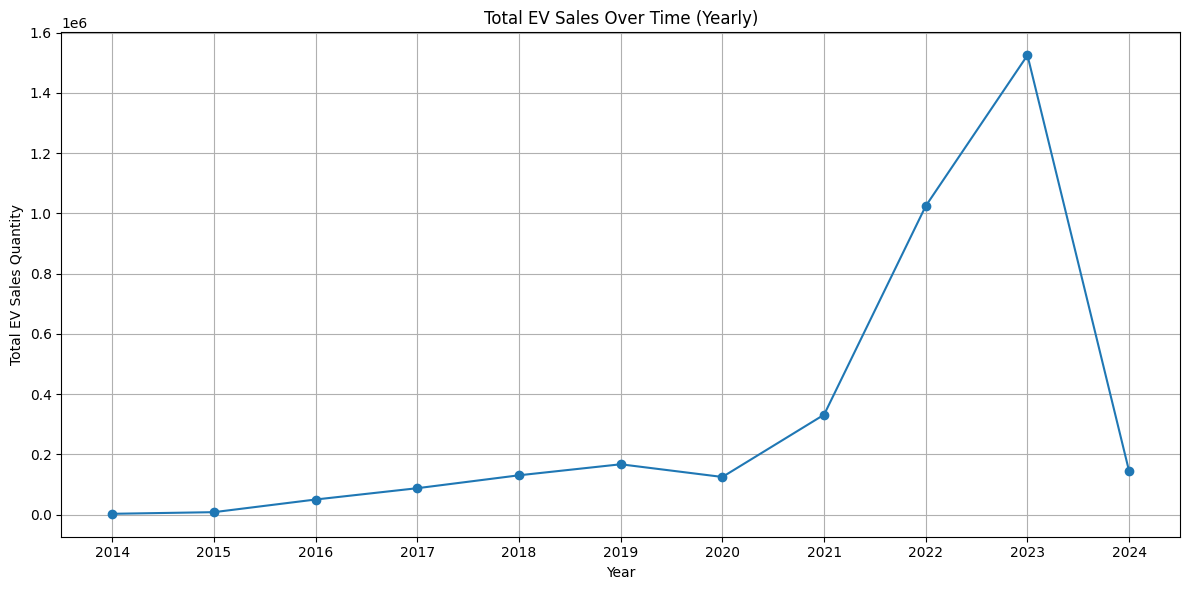

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales['Year'], yearly_sales['EV_Sales_Quantity'], marker='o', linestyle='-')
plt.title('Total EV Sales Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total EV Sales Quantity')
plt.grid(True)
plt.xticks(yearly_sales['Year'])
plt.tight_layout()
plt.show()

- The line plot [Image: yearly_ev_sales_trend.png] shows a clear upward trend in EV sales from 2014 to 2023, with an exceptional increase in 2022 and 2023.

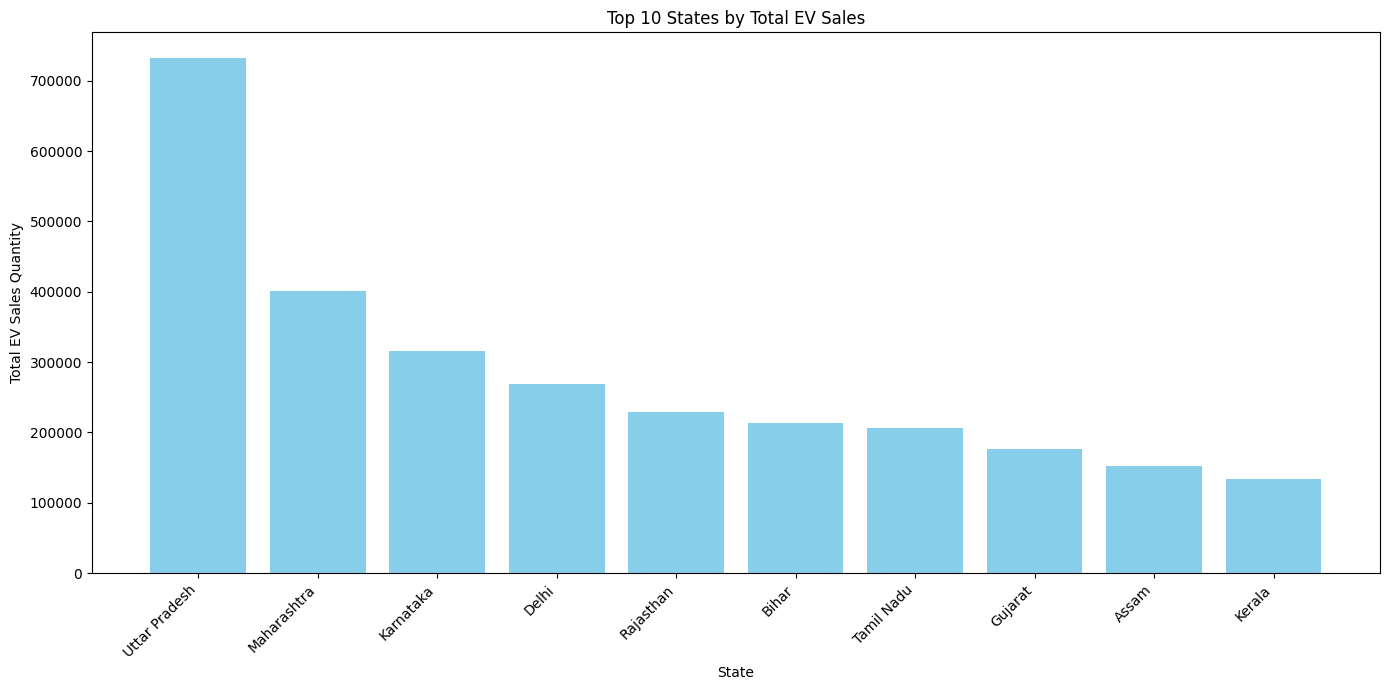

In [23]:
state_sales_top10 = data.groupby('State')['EV_Sales_Quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize=(14, 7))
plt.bar(state_sales_top10['State'], state_sales_top10['EV_Sales_Quantity'], color='skyblue')
plt.title('Top 10 States by Total EV Sales')
plt.xlabel('State')
plt.ylabel('Total EV Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- The bar chart [Image: top_10_states_ev_sales.png] illustrates that Uttar Pradesh leads significantly in total EV sales, followed by Maharashtra and Karnataka.

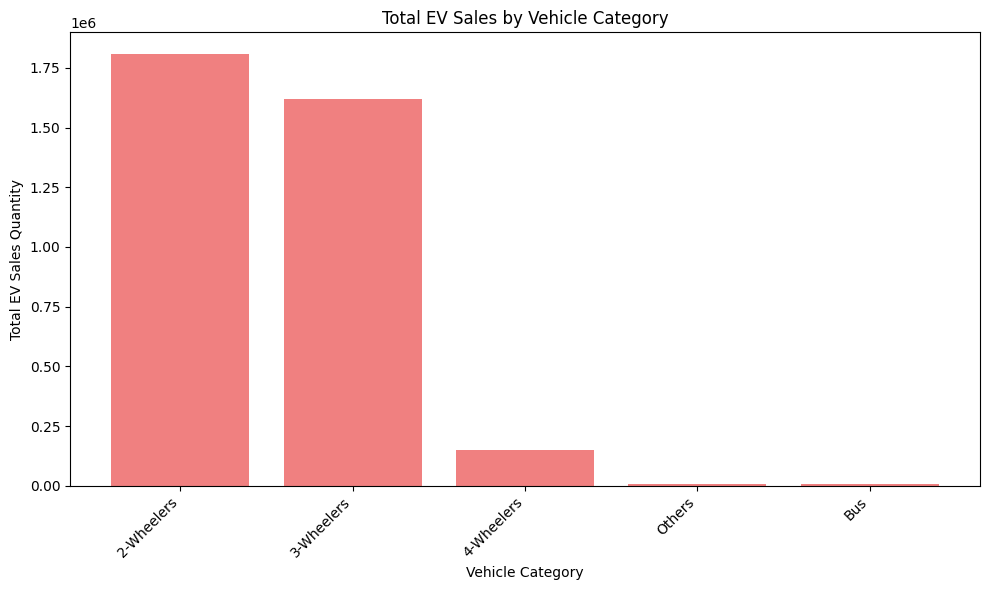

In [24]:
category_sales = data.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().reset_index()
category_sales = category_sales.sort_values(by='EV_Sales_Quantity', ascending=False) # Sort categories by sales quantity

plt.figure(figsize=(10, 6))
plt.bar(category_sales['Vehicle_Category'], category_sales['EV_Sales_Quantity'], color='lightcoral')
plt.title('Total EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Total EV Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- This bar chart [Image: ev_sales_by_vehicle_category.png] highlights that 2-Wheelers and 3-Wheelers dominate the EV market in terms of sales volume.

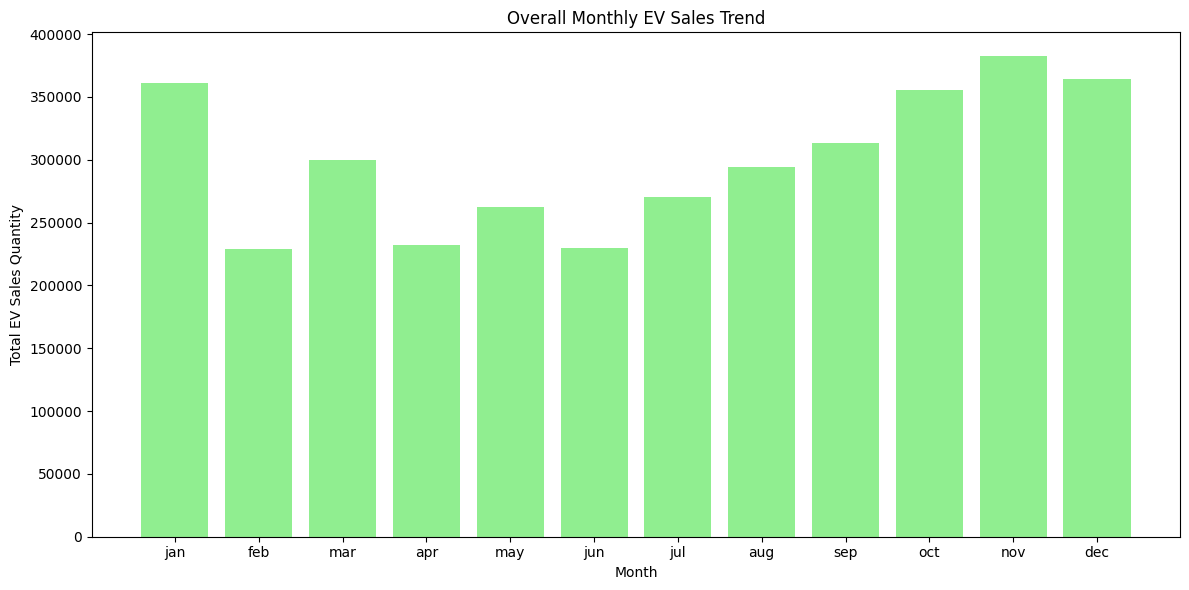

In [25]:
monthly_sales_overall = data.groupby('Month_Name')['EV_Sales_Quantity'].sum().reindex([
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_sales_overall['Month_Name'], monthly_sales_overall['EV_Sales_Quantity'], color='lightgreen')
plt.title('Overall Monthly EV Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total EV Sales Quantity')
plt.tight_layout()
plt.show()

- The bar chart [Image: overall_monthly_ev_sales.png] indicates that November, December, and January generally experience higher overall EV sales.